<img src="images/flu-vaccine.jpg" alt="Sample Image" style="width:1000px; height:440px;">

## **Overview**

This project focuses on predicting whether individuals received H1N1 and seasonal flu vaccines based on information they shared about their backgrounds, opinions, and health behaviors. The data comes from the National 2009 H1N1 Flu Survey conducted during the H1N1 influenza pandemic. The survey included questions about respondents' social, economic, and demographic backgrounds, their opinions on illness risks and vaccine effectiveness, and their behaviors towards mitigating transmission. Understanding how these factors relate to vaccination patterns can inform future public health efforts.

## **Business Problem**
A public health organization is dedicated to improving vaccination rates for both H1N1 and seasonal flu vaccines among the population to mitigate the spread of influenza viruses. Influenza vaccines are crucial for preventing illness, reducing the severity of symptoms, and minimizing the risk of complications, hospitalizations, and deaths associated with influenza infections. However, despite the availability of vaccines, vaccine hesitancy and refusal remain significant barriers to achieving high vaccination coverage rates.

To address this challenge, the organization aims to understand the multifaceted factors influencing individuals' decisions to get vaccinated or refuse vaccination. Leveraging data collected from the National 2009 H1N1 Flu Survey, the organization seeks to develop predictive models that can identify patterns and associations between individuals' backgrounds, opinions, and health behaviors and their likelihood of receiving flu vaccines. Additionally, the organization aims to explore reasons for vaccine hesitancy and refusal, such as concerns about vaccine safety and effectiveness, mistrust in healthcare authorities, misconceptions about influenza risks, and cultural or socioeconomic barriers to accessing vaccination services.

By gaining insights into these complex dynamics, the organization intends to tailor targeted interventions and public health campaigns to address specific barriers to vaccination uptake and effectively communicate the importance of vaccination. Ultimately, the goal is to increase vaccination acceptance, build trust in vaccination programs, and enhance community resilience against influenza outbreaks, thereby reducing the burden of influenza-related morbidity and mortality.


## **Data Understanding**

The dataset utilized in this project originates from the NHFS National Flu Survey conducted in 2009. It captures responses from approximately 26,000 individuals regarding their vaccination status for both seasonal flu and H1N1 flu. Additionally, the survey collects information on demographic, behavioral, and health factors of the respondents.

For this particular project, the target variable selected is the H1N1 vaccination rate. All features available in the survey are used for analysis. 

- **training_set_features.csv:** This dataset contains the features (independent variables) for the training set. Each row represents a sample, and each column represents a feature.

- **training_set_labels.csv:** This dataset contains the corresponding labels (target variables) for the training set features. Each label indicates whether the respondent received the seasonal flu vaccine or the H1N1 flu vaccine.

- **test_set_features.csv:** This dataset contains the features similar to the training set features but without the corresponding labels. This dataset is used to make predictions after training the model.

In [147]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, classification_report
from sklearn.experimental import enable_iterative_imputer  # explicitly enable IterativeImputer
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings("ignore")


In [148]:
# Define hospital-themed colors
hospital_colors = ['#1F4E79', '#008000', '#800000', '#FF4500', '#ADD8E6',
                   '#90EE90', '#808080', '#D3D3D3', '#008080', '#E6E6FA']

# Set the color cycle to use hospital-themed colors
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=hospital_colors)

In [149]:
# Reading in the feature data
dataFeatures = pd.read_csv("Data/training_set_features.csv")
dataFeatures.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [150]:
dataFeatures.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [151]:
# Reading in the target data
dataLabel = pd.read_csv('Data/training_set_labels.csv')
dataLabel.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


### Viewing class imbalance in the target class

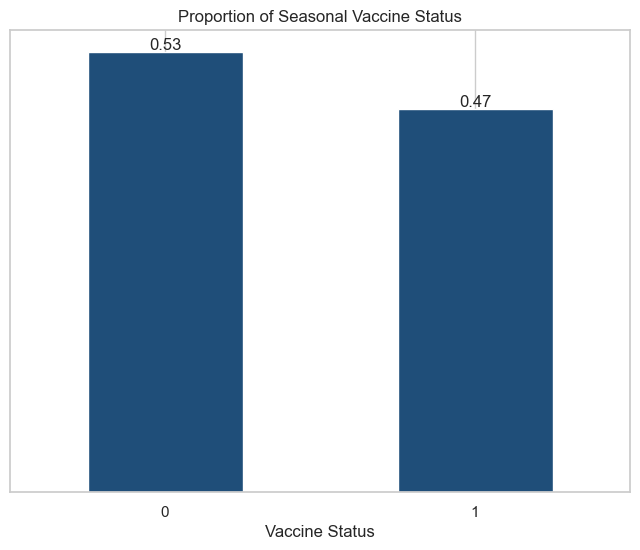

In [152]:
# Plotting the bar plot
plt.figure(figsize=(8, 6))
ax = dataLabel['seasonal_vaccine'].value_counts(normalize=True).plot(kind='bar')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Customize plot appearance
plt.title('Proportion of Seasonal Vaccine Status')
plt.xlabel('Vaccine Status')
plt.ylabel('')
plt.xticks(rotation=0)
plt.yticks([])  # Remove values from y-axis
plt.show()

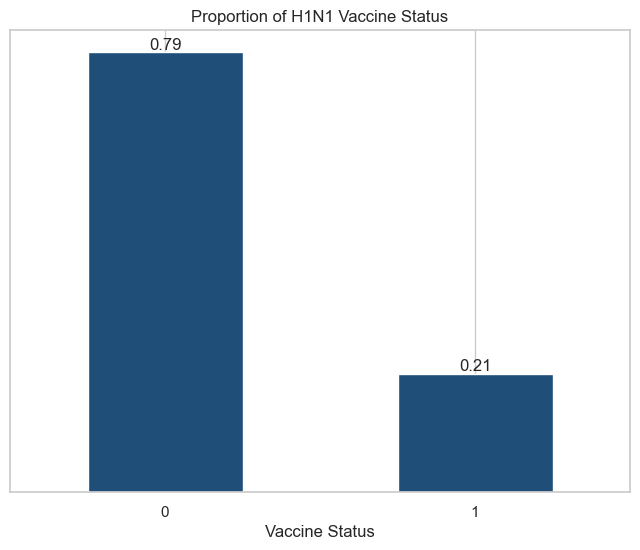

In [153]:
# Plotting the bar plot
plt.figure(figsize=(8, 6))
ax = dataLabel['h1n1_vaccine'].value_counts(normalize=True).plot(kind='bar')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Customize plot appearance
plt.title('Proportion of H1N1 Vaccine Status')
plt.xlabel('Vaccine Status')
plt.ylabel('')
plt.xticks(rotation=0)
plt.yticks([])  # Remove values from y-axis
plt.show()

In [154]:
dataLabel.drop(columns=['seasonal_vaccine'], inplace=True)

In [155]:
# Merging feature and target data
mergedData = dataFeatures.merge(dataLabel, how='left', on='respondent_id')
mergedData.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0


In [156]:
mergedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [157]:
mergedData.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [158]:
# close to half the values of these columns are NULL so discarding
mergedData.drop(['health_insurance','employment_industry','employment_occupation', 'respondent_id', 'child_under_6_months','opinion_h1n1_sick_from_vacc','opinion_seas_sick_from_vacc','behavioral_large_gatherings', 'behavioral_outside_home','marital_status',
           'behavioral_avoidance','behavioral_face_mask','employment_status','education','census_msa'],axis=1,inplace = True)

In [159]:
mergedData.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_wash_hands,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_seas_vacc_effective,opinion_seas_risk,household_adults,household_children,h1n1_vaccine
count,26615.000000,26591.000000,26636.000000,26665.000000,26579.000000,24547.000000,24547.000000,25736.000000,25903.000000,26316.000000,26319.000000,26245.000000,26193.000000,26458.000000,26458.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.825614,0.677264,0.220312,0.329735,0.283261,0.111918,3.850623,2.342566,4.025986,2.719162,0.886499,0.534583,0.212454
std,0.910311,0.618149,0.215545,0.379448,0.467531,0.414466,0.470126,0.450591,0.315271,1.007436,1.285539,1.086565,1.385055,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2.000000,4.000000,2.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,5.000000,4.000000,5.000000,4.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [160]:
mergedData.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_wash_hands', 'behavioral_touch_face', 'doctor_recc_h1n1',
       'doctor_recc_seasonal', 'chronic_med_condition', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_seas_vacc_effective', 'opinion_seas_risk', 'age_group', 'race',
       'sex', 'income_poverty', 'rent_or_own', 'hhs_geo_region',
       'household_adults', 'household_children', 'h1n1_vaccine'],
      dtype='object')

### **EDA**

#### Numerical features

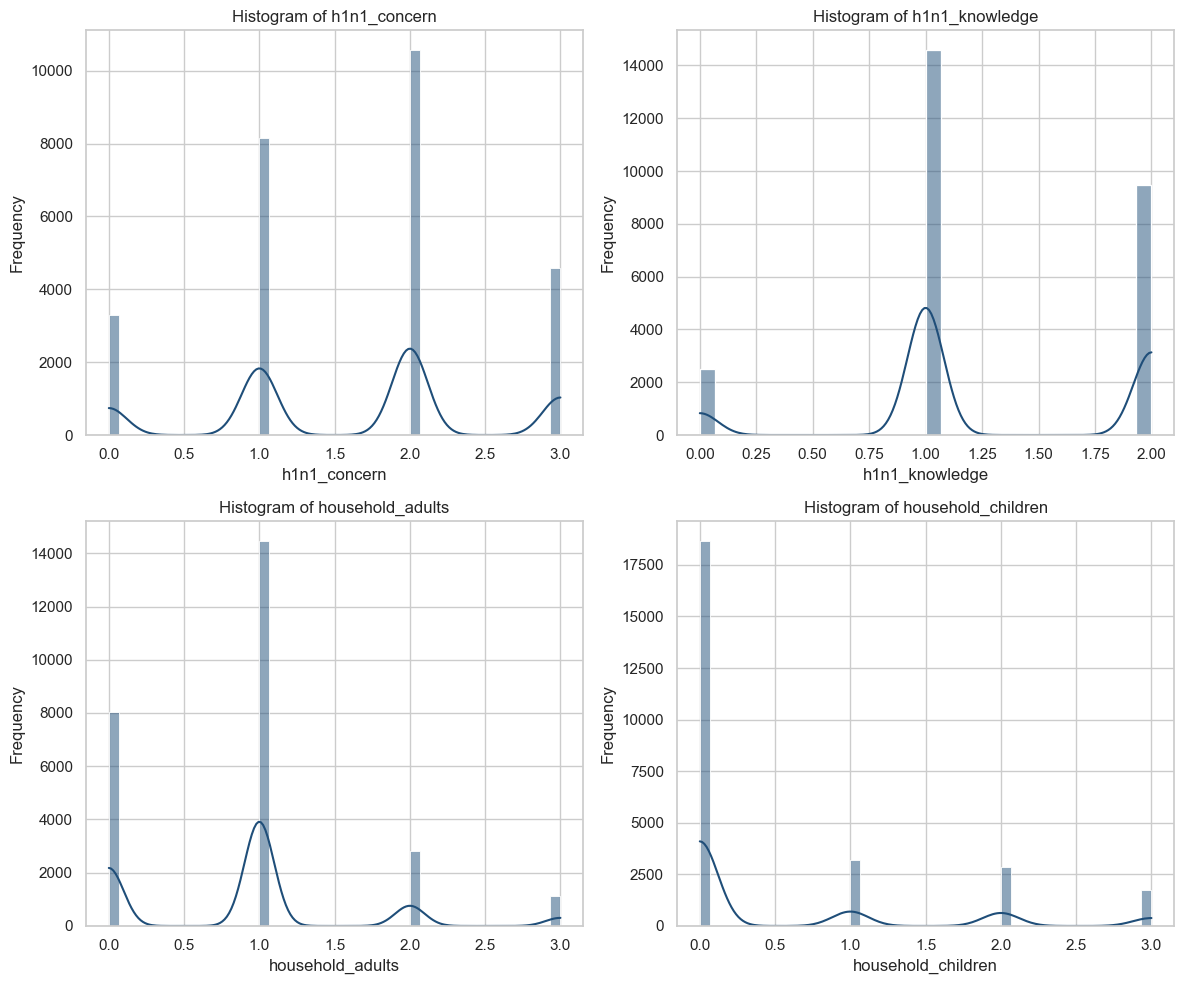

In [161]:
# List of numerical features
numerical_features = ['h1n1_concern', 'h1n1_knowledge', 'household_adults', 'household_children']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create histograms for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.histplot(mergedData[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap of labels
plt.tight_layout()

# Show the plot
plt.show()

In [162]:
str_cols = mergedData.select_dtypes(include = 'object').columns
mergedData[str_cols].head()

,age_group,race,sex,income_poverty,rent_or_own,hhs_geo_region
0,55 - 64 Years,White,Female,Below Poverty,Own,oxchjgsf
1,35 - 44 Years,White,Male,Below Poverty,Rent,bhuqouqj
2,18 - 34 Years,White,Male,"<= $75,000, Above Poverty",Own,qufhixun
3,65+ Years,White,Female,Below Poverty,Rent,lrircsnp
4,45 - 54 Years,White,Female,"<= $75,000, Above Poverty",Own,qufhixun


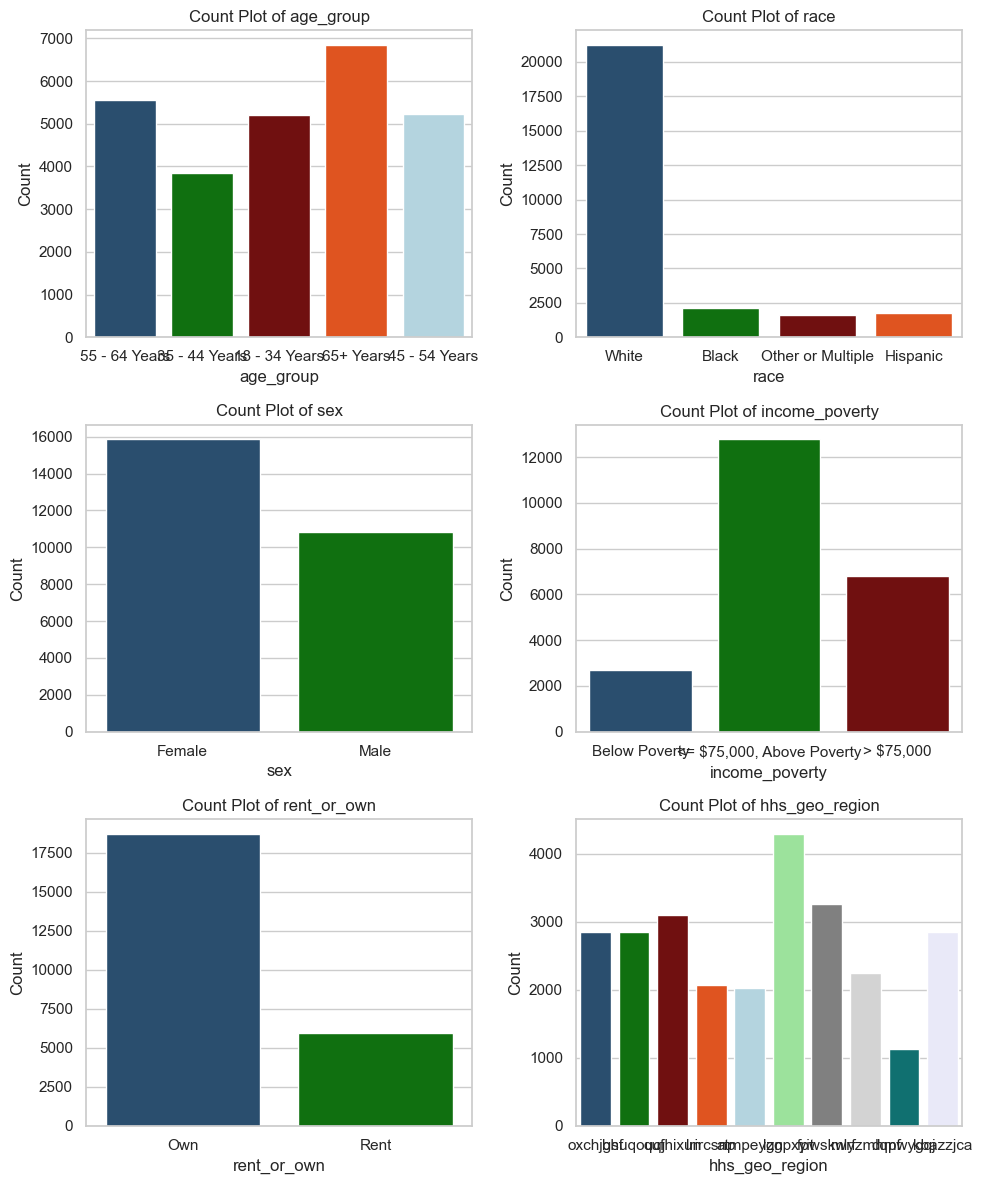

In [163]:
# List of categorical features
categorical_features = ['age_group', 'race', 'sex', 'income_poverty', 
                         'rent_or_own','hhs_geo_region']

# Create subplots for categorical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))
axes = axes.flatten()

# Create count plots for categorical features
for i, feature in enumerate(categorical_features):
    sns.countplot(data=mergedData, x=feature, ax=axes[i])
    axes[i].set_title(f'Count Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')

# Adjust layout to prevent overlap of labels
plt.tight_layout()

# Show the plot for categorical features
plt.show()

In [164]:
# All the NULL values are populated with the mode
for col in mergedData.columns:
    if mergedData[col].isnull().sum() and mergedData[col].dtypes != 'object':
        mergedData[col].loc[(dataFeatures[col].isnull())] = mergedData[col].median()
for col in mergedData.columns:
    if mergedData[col].isnull().sum() and mergedData[col].dtypes == 'object':
        mergedData[col].loc[(mergedData[col].isnull())] = mergedData[col].mode().max()

In [165]:
mergedData.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_wash_hands          0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
age_group                      0
race                           0
sex                            0
income_poverty                 0
rent_or_own                    0
hhs_geo_region                 0
household_adults               0
household_children             0
h1n1_vaccine                   0
dtype: int64

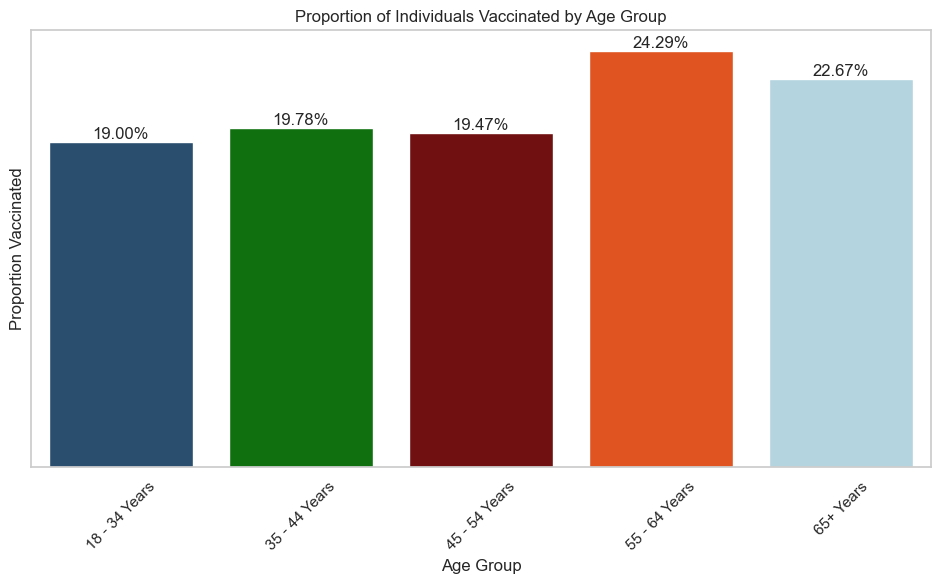

In [166]:
# Calculate the proportion of vaccinated individuals in each age group
vaccinated_by_age = mergedData.groupby('age_group')['h1n1_vaccine'].mean()

# Sort the vaccinated_by_age Series by index in ascending order
vaccinated_by_age_sorted = vaccinated_by_age.sort_index()

# Plot the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=vaccinated_by_age_sorted.index, y=vaccinated_by_age_sorted.values)
plt.title('Proportion of Individuals Vaccinated by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion Vaccinated')
plt.xticks(rotation=45)
plt.tight_layout()

# Add values on top of the bars in percentage format
for idx, value in enumerate(vaccinated_by_age_sorted.values):
    bar_plot.text(idx, value, '{:.2%}'.format(value), ha="center", va="bottom")

# Remove y-axis values
plt.gca().axes.yaxis.set_ticks([])

plt.show()

**Vaccination Rates by Age Group:** The proportion of individuals vaccinated against H1N1 varies across different age groups. For example, younger age groups such as "18 - 34 Years" have a lower vaccination rate compared to older age groups like "65+ Years."

Age appears to be a significant factor influencing vaccination decisions. Older age groups tend to have higher vaccination rates compared to younger age groups. This could be due to factors such as increased susceptibility to the virus or higher awareness among older individuals about the benefits of vaccination.

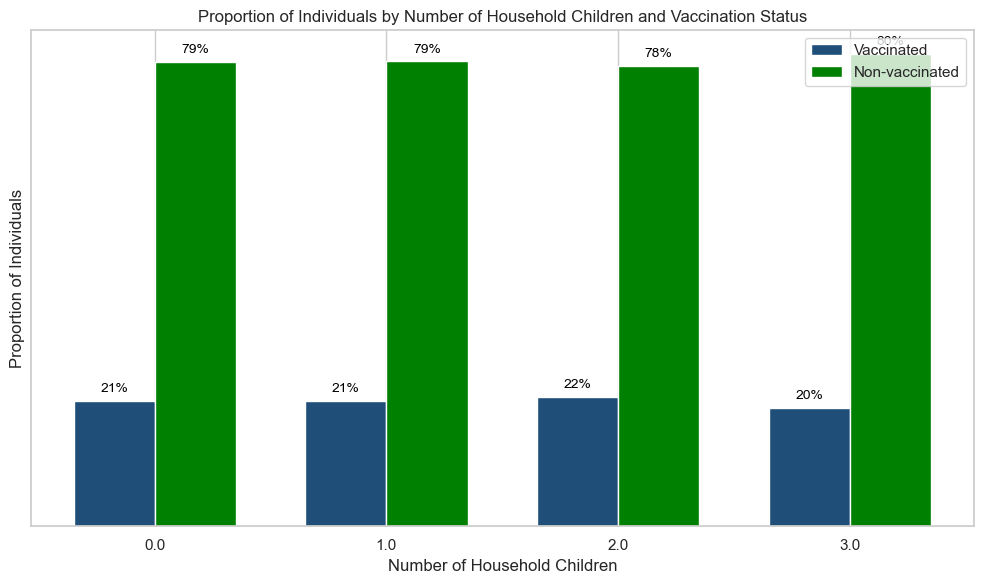

In [167]:
# Calculate the proportion of vaccinated individuals for each number of household children
vaccinated_by_children = mergedData.groupby('household_children')['h1n1_vaccine'].mean()

# Calculate the proportion of non-vaccinated individuals for each number of household children
non_vaccinated_by_children = 1 - vaccinated_by_children

# Sort the vaccinated_by_children Series by index in ascending order
vaccinated_by_children_sorted = vaccinated_by_children.sort_index()
non_vaccinated_by_children_sorted = non_vaccinated_by_children.sort_index()

# Plotting side by side bars
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(vaccinated_by_children_sorted.index))

# Plotting vaccinated individuals
plt.bar(index, vaccinated_by_children_sorted.values, bar_width, label='Vaccinated')

# Plotting non-vaccinated individuals beside vaccinated individuals
plt.bar(index + bar_width, non_vaccinated_by_children_sorted.values, bar_width, label='Non-vaccinated')

# Adding labels and title
plt.title('Proportion of Individuals by Number of Household Children and Vaccination Status')
plt.xlabel('Number of Household Children')
plt.ylabel('Proportion of Individuals')
plt.xticks(index + bar_width / 2, vaccinated_by_children_sorted.index)  # Adjusting x ticks
plt.legend()

# Adding percentage values on top of the bars
for i, (vacc, non_vacc) in enumerate(zip(vaccinated_by_children_sorted.values, non_vaccinated_by_children_sorted.values)):
    plt.text(i, vacc + 0.01, '{:.0%}'.format(vacc), ha="center", va="bottom", color='black', fontsize=10)
    plt.text(i + bar_width, non_vacc + 0.01, '{:.0%}'.format(non_vacc), ha="center", va="bottom", color='black', fontsize=10)

# Remove y-axis
plt.gca().axes.yaxis.set_ticks([])

plt.tight_layout()

# Show plot
plt.show()

In [168]:
# Create a cross-tabulation of vaccination status by contact with young children
contact_children_cross_tab = pd.crosstab(index=mergedData['household_children'], columns=mergedData['h1n1_vaccine'], normalize='index')

# Print the cross-tabulation
print(contact_children_cross_tab)

h1n1_vaccine               0         1
household_children                    
0.0                 0.787432  0.212568
1.0                 0.787717  0.212283
2.0                 0.780377  0.219623
3.0                 0.800229  0.199771


No Children in Household (0.0): About 21.26% of individuals with no children in their household were vaccinated against H1N1, while approximately 78.74% were not vaccinated.
1 Child in Household (1.0): Approximately 21.23% of individuals with one child in their household were vaccinated against H1N1, while around 78.77% were not vaccinated.
2 Children in Household (2.0): About 21.96% of individuals with two children in their household were vaccinated against H1N1, while approximately 78.04% were not vaccinated.
3 Children in Household (3.0): Approximately 19.98% of individuals with three children in their household were vaccinated against H1N1, while around 80.02% were not vaccinated.
From these results, it appears that the proportion of vaccinated individuals slightly decreases with an increase in the number of children in the household. However, the differences in vaccination rates across different household compositions are relatively small.

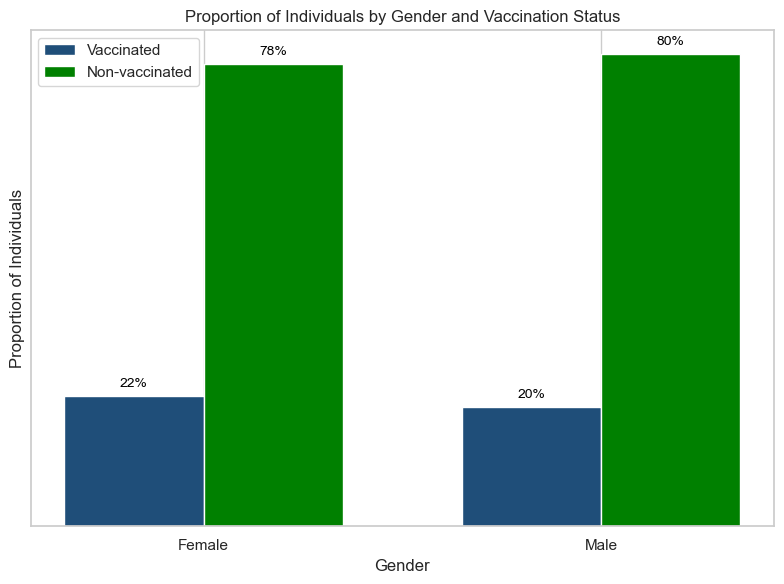

In [169]:
# Calculate the proportion of vaccinated individuals by gender
vaccinated_by_gender = mergedData.groupby('sex')['h1n1_vaccine'].mean()

# Calculate the proportion of non-vaccinated individuals by gender
non_vaccinated_by_gender = 1 - vaccinated_by_gender

# Plotting side by side bars
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(vaccinated_by_gender.index))

# Plotting vaccinated individuals
plt.bar(index, vaccinated_by_gender.values, bar_width, label='Vaccinated')

# Plotting non-vaccinated individuals beside vaccinated individuals
plt.bar(index + bar_width, non_vaccinated_by_gender.values, bar_width, label='Non-vaccinated')

# Adding labels and title
plt.title('Proportion of Individuals by Gender and Vaccination Status')
plt.xlabel('Gender')
plt.ylabel('Proportion of Individuals')
plt.xticks(index + bar_width / 2, vaccinated_by_gender.index)  # Adjusting x ticks
plt.legend()

# Adding percentage values on top of the bars
for i, (vacc, non_vacc) in enumerate(zip(vaccinated_by_gender.values, non_vaccinated_by_gender.values)):
    plt.text(i, vacc + 0.01, '{:.0%}'.format(vacc), ha="center", va="bottom", color='black', fontsize=10)
    plt.text(i + bar_width, non_vacc + 0.01, '{:.0%}'.format(non_vacc), ha="center", va="bottom", color='black', fontsize=10)

# Remove y-axis
plt.gca().axes.yaxis.set_ticks([])

plt.tight_layout()

# Show plot
plt.show()

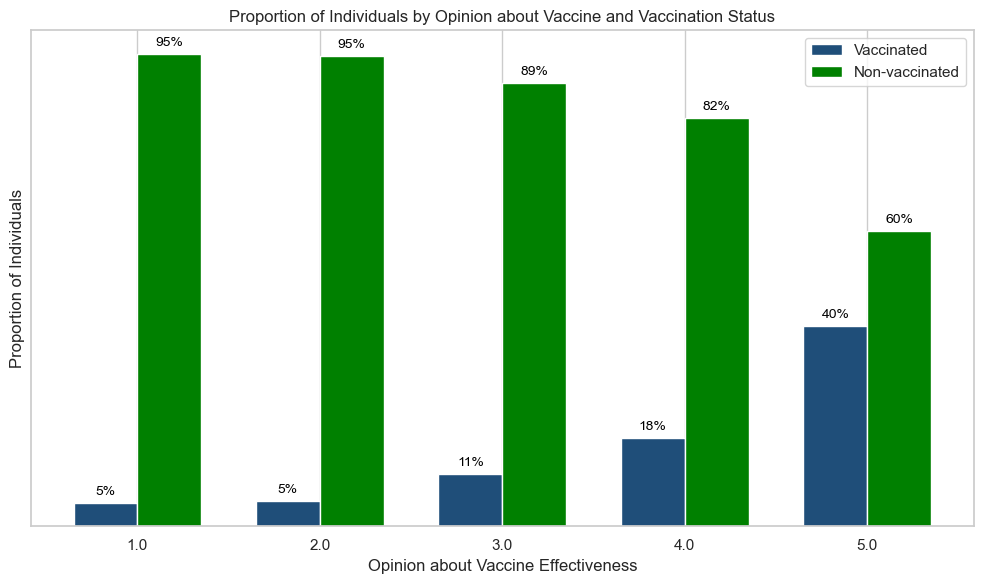

In [170]:
# Calculate the proportion of vaccinated individuals by opinion about the vaccine
vaccinated_by_opinion = mergedData.groupby('opinion_h1n1_vacc_effective')['h1n1_vaccine'].mean()

# Calculate the proportion of non-vaccinated individuals by opinion about the vaccine
non_vaccinated_by_opinion = 1 - vaccinated_by_opinion

# Plotting side by side bars
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(vaccinated_by_opinion.index))

# Plotting vaccinated individuals
plt.bar(index, vaccinated_by_opinion.values, bar_width, label='Vaccinated')

# Plotting non-vaccinated individuals beside vaccinated individuals
plt.bar(index + bar_width, non_vaccinated_by_opinion.values, bar_width, label='Non-vaccinated')

# Adding labels and title
plt.title('Proportion of Individuals by Opinion about Vaccine and Vaccination Status')
plt.xlabel('Opinion about Vaccine Effectiveness')
plt.ylabel('Proportion of Individuals')
plt.xticks(index + bar_width / 2, vaccinated_by_opinion.index)  # Adjusting x ticks
plt.legend()

# Adding percentage values on top of the bars
for i, (vacc, non_vacc) in enumerate(zip(vaccinated_by_opinion.values, non_vaccinated_by_opinion.values)):
    plt.text(i, vacc + 0.01, '{:.0%}'.format(vacc), ha="center", va="bottom", color='black', fontsize=10)
    plt.text(i + bar_width, non_vacc + 0.01, '{:.0%}'.format(non_vacc), ha="center", va="bottom", color='black', fontsize=10)

# Remove y-axis
plt.gca().axes.yaxis.set_ticks([])

plt.tight_layout()

# Show plot
plt.show()

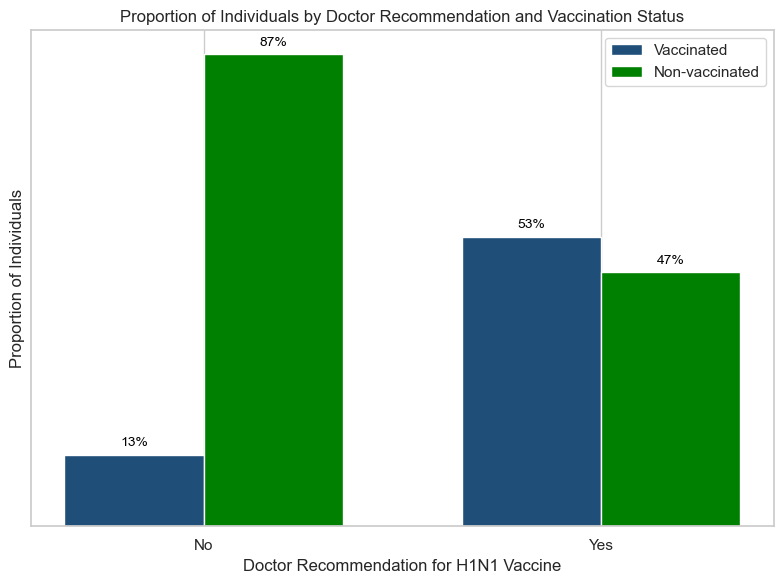

In [171]:
# Calculate the proportion of vaccinated individuals by doctor recommendation
vaccinated_by_doctor_recommendation = mergedData.groupby('doctor_recc_h1n1')['h1n1_vaccine'].mean()

# Calculate the proportion of non-vaccinated individuals by doctor recommendation
non_vaccinated_by_doctor_recommendation = 1 - vaccinated_by_doctor_recommendation

# Plotting side by side bars
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(vaccinated_by_doctor_recommendation.index))

# Plotting vaccinated individuals
plt.bar(index, vaccinated_by_doctor_recommendation.values, bar_width, label='Vaccinated')

# Plotting non-vaccinated individuals beside vaccinated individuals
plt.bar(index + bar_width, non_vaccinated_by_doctor_recommendation.values, bar_width, label='Non-vaccinated')

# Adding labels and title
plt.title('Proportion of Individuals by Doctor Recommendation and Vaccination Status')
plt.xlabel('Doctor Recommendation for H1N1 Vaccine')
plt.ylabel('Proportion of Individuals')
plt.xticks(index + bar_width / 2, ['No', 'Yes'])  # Adjusting x ticks
plt.legend()

# Adding percentage values on top of the bars
for i, (vacc, non_vacc) in enumerate(zip(vaccinated_by_doctor_recommendation.values, non_vaccinated_by_doctor_recommendation.values)):
    plt.text(i, vacc + 0.01, '{:.0%}'.format(vacc), ha="center", va="bottom", color='black', fontsize=10)
    plt.text(i + bar_width, non_vacc + 0.01, '{:.0%}'.format(non_vacc), ha="center", va="bottom", color='black', fontsize=10)

# Remove y-axis
plt.gca().axes.yaxis.set_ticks([])

plt.tight_layout()

# Show plot
plt.show()

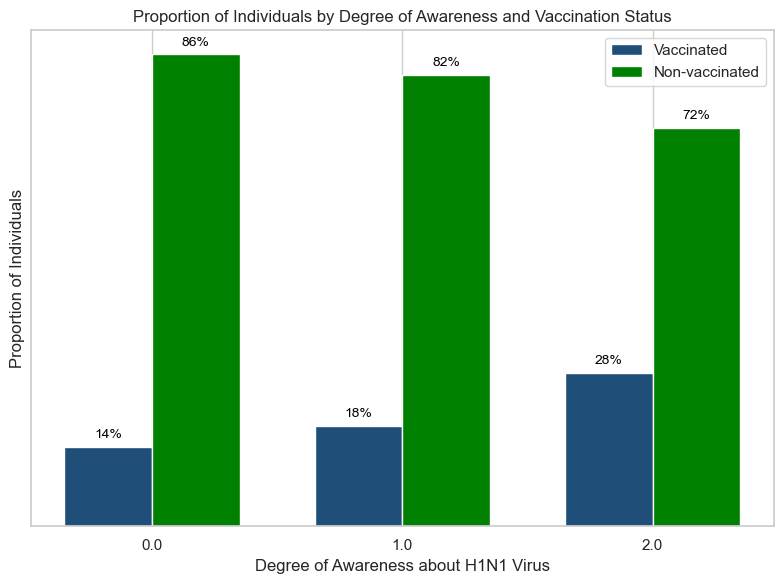

In [172]:
# Calculate the proportion of vaccinated individuals by degree of awareness
vaccinated_by_awareness = mergedData.groupby('h1n1_knowledge')['h1n1_vaccine'].mean()

# Calculate the proportion of non-vaccinated individuals by degree of awareness
non_vaccinated_by_awareness = 1 - vaccinated_by_awareness

# Plotting side by side bars
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(vaccinated_by_awareness.index))

# Plotting vaccinated individuals
plt.bar(index, vaccinated_by_awareness.values, bar_width, label='Vaccinated')

# Plotting non-vaccinated individuals beside vaccinated individuals
plt.bar(index + bar_width, non_vaccinated_by_awareness.values, bar_width, label='Non-vaccinated')

# Adding labels and title
plt.title('Proportion of Individuals by Degree of Awareness and Vaccination Status')
plt.xlabel('Degree of Awareness about H1N1 Virus')
plt.ylabel('Proportion of Individuals')
plt.xticks(index + bar_width / 2, vaccinated_by_awareness.index)  # Adjusting x ticks
plt.legend()

# Adding percentage values on top of the bars
for i, (vacc, non_vacc) in enumerate(zip(vaccinated_by_awareness.values, non_vaccinated_by_awareness.values)):
    plt.text(i, vacc + 0.01, '{:.0%}'.format(vacc), ha="center", va="bottom", color='black', fontsize=10)
    plt.text(i + bar_width, non_vacc + 0.01, '{:.0%}'.format(non_vacc), ha="center", va="bottom", color='black', fontsize=10)

# Remove y-axis
plt.gca().axes.yaxis.set_ticks([])

plt.tight_layout()

# Show plot
plt.show()

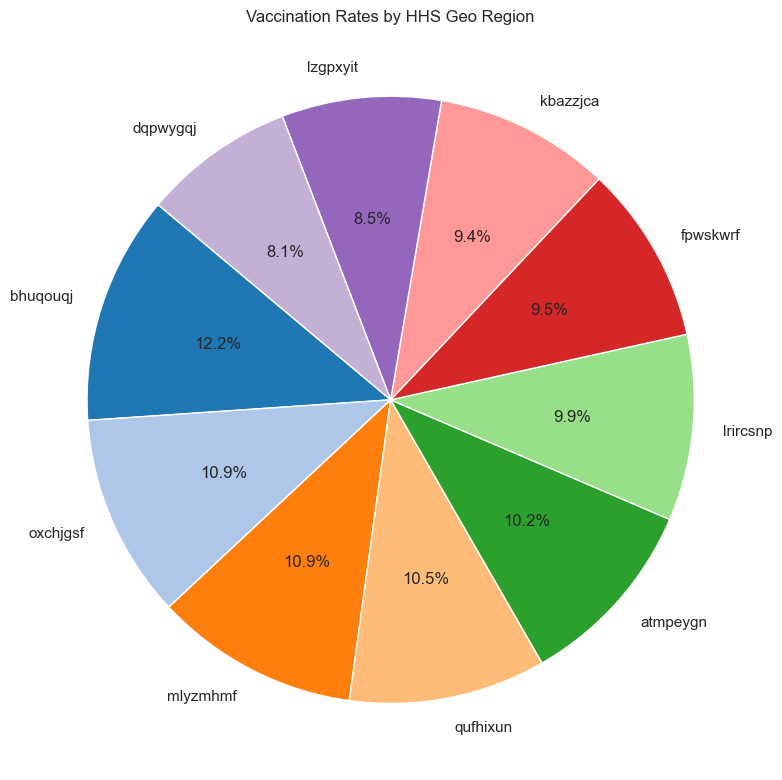

In [173]:
# Group the data by hhs_geo_region and calculate the mean vaccination rate for each region
vaccination_by_region = mergedData.groupby('hhs_geo_region')['h1n1_vaccine'].mean().sort_values(ascending=False)
# Plot a pie chart of vaccination rates by region
plt.figure(figsize=(8, 8))
plt.pie(vaccination_by_region, labels=vaccination_by_region.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors) 
plt.title('Vaccination Rates by HHS Geo Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

# Show plot
plt.show()

In [174]:
LE = LabelEncoder()
for col in str_cols:
    mergedData[col] = LE.fit_transform(mergedData[col]) # Converts to int64

In [175]:
mergedData[str_cols].head()

,age_group,race,sex,income_poverty,rent_or_own,hhs_geo_region
0,3,3,0,2,0,8
1,1,3,1,2,1,1
2,0,3,1,0,0,9
3,4,3,0,2,1,5
4,2,3,0,0,0,9


### **Feature Selection**

In [176]:
# Calculate the correlation matrix
corr_matrix = mergedData.corr()

# Get the absolute correlation of features with the target variable
corr_with_target = abs(corr_matrix['h1n1_vaccine']).sort_values(ascending=False)

# Select the top k features based on correlation strength
k = 20  # Adjust as needed
selected_features = corr_with_target[1:k+1].index.tolist()

# Print the selected features
print("Selected Features:")
for feature in selected_features:
    print("-", feature)

Selected Features:
- doctor_recc_h1n1
- opinion_h1n1_risk
- opinion_h1n1_vacc_effective
- opinion_seas_risk
- doctor_recc_seasonal
- opinion_seas_vacc_effective
- health_worker
- h1n1_concern
- h1n1_knowledge
- chronic_med_condition
- behavioral_wash_hands
- behavioral_touch_face
- age_group
- race
- behavioral_antiviral_meds
- rent_or_own
- income_poverty
- sex
- household_adults
- hhs_geo_region


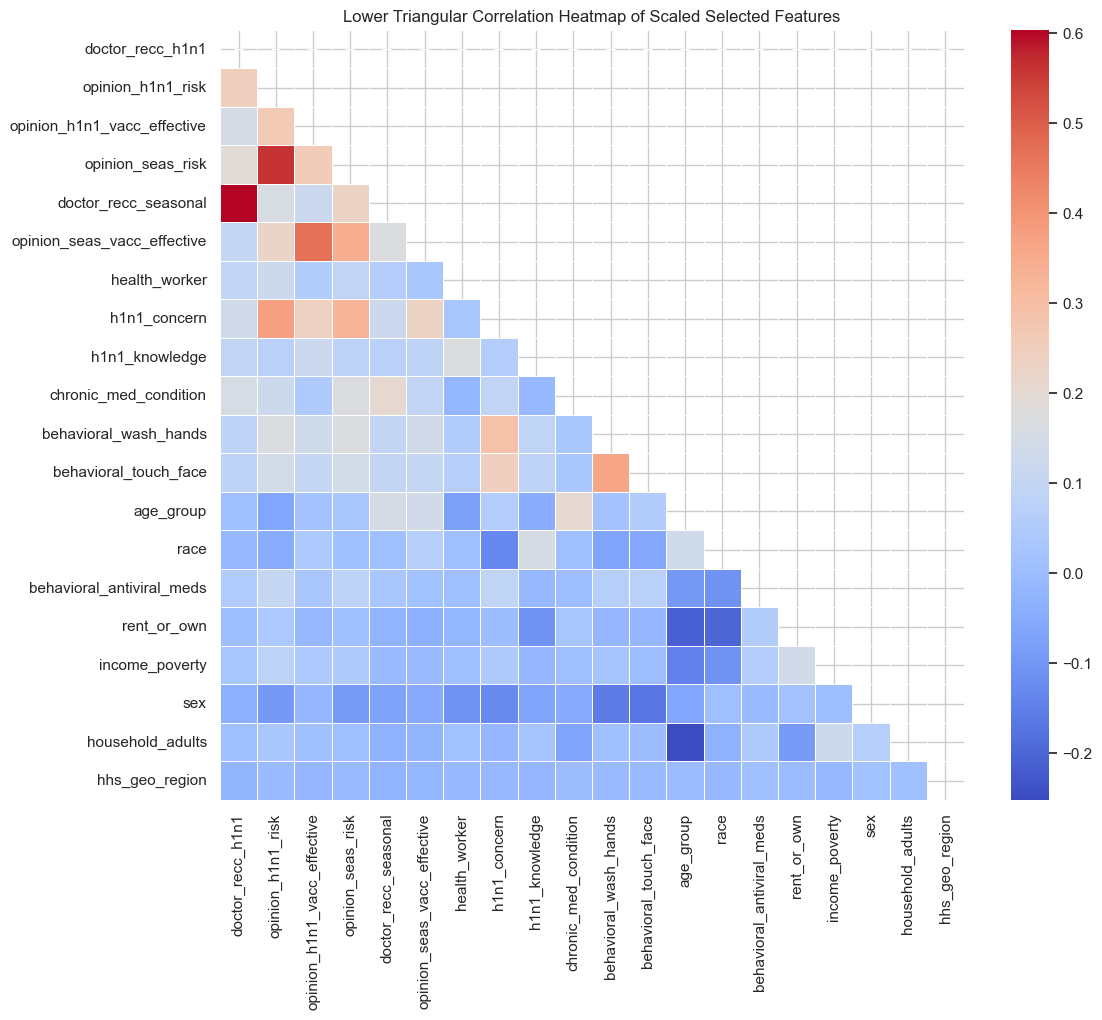

In [177]:
# Extract the selected features from the dataset
selected_features_df = mergedData[selected_features]

# Scale the selected features
scaler = StandardScaler()
scaled_selected_features = scaler.fit_transform(selected_features_df)

# Convert scaled features back to DataFrame
scaled_selected_features_df = pd.DataFrame(scaled_selected_features, columns=selected_features)

# Calculate the correlation matrix for scaled selected features
selected_corr_matrix = scaled_selected_features_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(selected_corr_matrix, dtype=bool))

# Plot the correlation heatmap for selected features
plt.figure(figsize=(12, 10))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Lower Triangular Correlation Heatmap of Scaled Selected Features')
plt.show()

### **Modelling**

#### 5. Data Splitting and Test data processing <a id="split"></a> 
#### Choosing 80%, 20% for train and validation

In [201]:
# # Step 1: Split Data
# X = scaled_selected_features_df
# y = mergedData['h1n1_vaccine']  # Extract the target variable from the original dataset

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
# Copy the scaled selected features DataFrame to a new DataFrame
features_with_label = scaled_selected_features_df.copy()

# Add the 'h1n1_vaccine' column from the mergedData DataFrame to the features DataFrame
features_with_label['h1n1_vaccine'] = mergedData['h1n1_vaccine']

# Now features_with_label contains the selected features along with the 'h1n1_vaccine' column

# Separate features and labels
features = features_with_label.drop(columns=['h1n1_vaccine'])  # Drop the target variable
label = features_with_label['h1n1_vaccine']  # Extract the target variable

In [207]:
# Split the data into training and testing sets
train, test = train_test_split(features_with_label, test_size=0.2, shuffle=True)

# Separate features and labels for training set
train_x, train_y = train.drop(columns=['h1n1_vaccine']), train['h1n1_vaccine']

# Separate features and labels for testing set
test_x, test_y = test.drop(columns=['h1n1_vaccine']), test['h1n1_vaccine']


In [224]:
features_with_label.shape

(26707, 21)

In [208]:
train_y.unique()

array([0, 1], dtype=int64)

In [209]:
# Handling class imbalance with SMOTE (Synthetic Minority Over-sampling Technique)
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(train_x, train_y)

In [210]:
# Calculate class distribution of the resampled target variable
class_distribution = pd.Series(y_resampled).value_counts()

# Print the class distribution
print("Class Distribution after SMOTE:")
print(class_distribution)


Class Distribution after SMOTE:
h1n1_vaccine
0    16867
1    16867
Name: count, dtype: int64


In [214]:
X_resampled.head()

,doctor_recc_h1n1,opinion_h1n1_risk,opinion_h1n1_vacc_effective,opinion_seas_risk,doctor_recc_seasonal,opinion_seas_vacc_effective,health_worker,h1n1_concern,h1n1_knowledge,chronic_med_condition,behavioral_wash_hands,behavioral_touch_face,age_group,race,behavioral_antiviral_meds,rent_or_own,income_poverty,sex,household_adults,hhs_geo_region
0,-0.503893,1.302012,-0.852660,0.941455,-0.659437,-0.952118,-0.34895,0.418262,1.197027,-0.612735,0.459149,0.687870,0.558480,-2.784094,-0.226293,1.872023,-0.681106,-0.827124,-1.183463,-0.652099
1,-0.503893,-1.047610,0.147164,-1.240062,-0.659437,-0.023708,-0.34895,-0.681849,-0.423626,-0.612735,0.459149,0.687870,-1.500131,0.465442,4.419056,-0.534182,2.299931,1.209008,0.149930,0.417065
2,-0.503893,1.302012,-0.852660,-1.240062,-0.659437,-0.952118,-0.34895,0.418262,-0.423626,1.632027,0.459149,0.687870,1.244684,0.465442,-0.226293,-0.534182,2.299931,-0.827124,0.149930,1.129841
3,1.984546,2.085220,1.146988,1.668627,1.516445,0.904702,-0.34895,-1.781960,1.197027,-0.612735,0.459149,0.687870,-1.500131,0.465442,4.419056,1.872023,2.299931,1.209008,-1.183463,1.129841
4,-0.503893,-0.264403,1.146988,-1.240062,-0.659437,0.904702,-0.34895,0.418262,1.197027,-0.612735,0.459149,-1.453764,-0.127724,0.465442,-0.226293,-0.534182,0.809413,1.209008,2.816717,1.486229


In [215]:
y_resampled.head()

0    0
1    0
2    0
3    1
4    0
Name: h1n1_vaccine, dtype: int64

In [216]:
def preprocess_test_data(testData):
    # Drop unnecessary columns
    testData.drop(['health_insurance','employment_industry','employment_occupation', 'respondent_id', 'child_under_6_months','opinion_h1n1_sick_from_vacc','opinion_seas_sick_from_vacc','behavioral_large_gatherings', 'behavioral_outside_home','marital_status',
           'behavioral_avoidance','behavioral_face_mask','employment_status','education','census_msa'], axis=1, inplace=True)
    
    # Impute missing values for numerical features with median
    numerical_cols = testData.select_dtypes(include='number').columns
    for col in numerical_cols:
        testData[col].fillna(testData[col].median(), inplace=True)
        
    # Impute missing values for categorical features with mode
    categorical_cols = testData.select_dtypes(include='object').columns
    for col in categorical_cols:
        testData[col].fillna(testData[col].mode()[0], inplace=True)
        
    # Encode categorical variables
    LE = LabelEncoder()
    for col in categorical_cols:
        testData[col] = LE.fit_transform(testData[col])

    
    return testData



In [217]:
testData = pd.read_csv('Data/test_set_features.csv')
testData.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [218]:
testData.shape

(26708, 36)

In [219]:
testData = preprocess_test_data(testData)

In [220]:
# Calculate the correlation matrix for the training dataset
corr_matrix = mergedData.corr()

# Get the absolute correlation of features with the target variable
corr_with_target = abs(corr_matrix['h1n1_vaccine']).sort_values(ascending=False)

# Select the top k features based on correlation strength
k = 20  # Adjust as needed
selected_features = corr_with_target[1:k+1].index.tolist()

# Print the selected features
print("Selected Features:")
for feature in selected_features:
    print("-", feature)

# Now apply the selected features to the test dataset
test_selected_features = testData[selected_features]

# Scale the selected features
scaler = StandardScaler()
scaled_tested_features = scaler.fit_transform(test_selected_features)

# Convert scaled features back to DataFrame
scaled_tested_features_df = pd.DataFrame(scaled_tested_features, columns=selected_features)

Selected Features:
- doctor_recc_h1n1
- opinion_h1n1_risk
- opinion_h1n1_vacc_effective
- opinion_seas_risk
- doctor_recc_seasonal
- opinion_seas_vacc_effective
- health_worker
- h1n1_concern
- h1n1_knowledge
- chronic_med_condition
- behavioral_wash_hands
- behavioral_touch_face
- age_group
- race
- behavioral_antiviral_meds
- rent_or_own
- income_poverty
- sex
- household_adults
- hhs_geo_region


In [221]:
X_resampled.columns

Index(['doctor_recc_h1n1', 'opinion_h1n1_risk', 'opinion_h1n1_vacc_effective',
       'opinion_seas_risk', 'doctor_recc_seasonal',
       'opinion_seas_vacc_effective', 'health_worker', 'h1n1_concern',
       'h1n1_knowledge', 'chronic_med_condition', 'behavioral_wash_hands',
       'behavioral_touch_face', 'age_group', 'race',
       'behavioral_antiviral_meds', 'rent_or_own', 'income_poverty', 'sex',
       'household_adults', 'hhs_geo_region'],
      dtype='object')

In [222]:
scaled_tested_features_df.isnull().sum()

doctor_recc_h1n1               0
opinion_h1n1_risk              0
opinion_h1n1_vacc_effective    0
opinion_seas_risk              0
doctor_recc_seasonal           0
opinion_seas_vacc_effective    0
health_worker                  0
h1n1_concern                   0
h1n1_knowledge                 0
chronic_med_condition          0
behavioral_wash_hands          0
behavioral_touch_face          0
age_group                      0
race                           0
behavioral_antiviral_meds      0
rent_or_own                    0
income_poverty                 0
sex                            0
household_adults               0
hhs_geo_region                 0
dtype: int64

In [223]:
scaled_tested_features_df.shape

(26708, 20)

### **Baseline Models**

#### Decision Tree

In [228]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data using the trained classifier
y_pred = dt_classifier.predict(test_x)

# Evaluate the performance of the classifier
print("Classification Report:")
print(classification_report(test_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4166
           1       0.42      0.45      0.44      1176

    accuracy                           0.74      5342
   macro avg       0.63      0.64      0.63      5342
weighted avg       0.75      0.74      0.75      5342



Overall, the model has decent performance, with higher precision, recall, and F1-score for class 0 (No vaccination) compared to class 1 (Receiving vaccination). However, there is room for improvement, especially in correctly identifying instances that received the vaccination (class 1).

In [229]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data using the trained classifier
y_pred_rf = rf_classifier.predict(test_x)

# Evaluate the performance of the classifier
print("Classification Report for Random Forest:")
print(classification_report(test_y, y_pred_rf))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4166
           1       0.63      0.44      0.52      1176

    accuracy                           0.82      5342
   macro avg       0.74      0.68      0.70      5342
weighted avg       0.80      0.82      0.81      5342



Overall, the Random Forest classifier achieves decent performance, with high precision and recall for class 0 (not taking vaccine) but lower recall for class 1 (taking vaccine). This suggests that the model is better at predicting instances where individuals do not take the vaccine compared to instances where they do.

In [230]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data using the trained classifier
y_pred = knn_classifier.predict(test_x)

# Evaluate the performance of the classifier
print("Classification Report for KNN:")
print(classification_report(test_y, y_pred))

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.88      0.71      0.79      4166
           1       0.39      0.66      0.49      1176

    accuracy                           0.70      5342
   macro avg       0.64      0.69      0.64      5342
weighted avg       0.77      0.70      0.72      5342



Overall, the KNN model achieved higher performance in identifying instances of class 0 (not vaccinated) compared to class 1 (vaccinated), as reflected in the lower precision, recall, and F1-score for class 1. Further optimization or exploration of alternative models may be warranted to improve the classification performance, especially for the minority class (class 1).

In [231]:
# Initialize the Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Fit the classifier to the training data
naive_bayes_classifier.fit(X_resampled, y_resampled)

# Make predictions on the test data using the trained classifier
y_pred_nb = naive_bayes_classifier.predict(test_x)

# Generate the classification report
print("Classification Report for Naive Bayes:")
print(classification_report(test_y, y_pred_nb))

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      4166
           1       0.41      0.70      0.52      1176

    accuracy                           0.72      5342
   macro avg       0.65      0.71      0.66      5342
weighted avg       0.79      0.72      0.74      5342

